In [1]:
!pip install transformers torch datasets transformers[torch]

from google.colab import drive
import pandas as pd
from datasets import Dataset, DatasetDict
import torch
import numpy as np

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 28.2 MB/s eta 0:00:00
Mounted at /content/drive


In [3]:
tr = pd.read_csv(file_path + 'TPTN_refine.csv')
fs = pd.read_csv(file_path + 'FPFN_refine.csv')

In [4]:
tr['label'].value_counts()

1.0    37828
0.0    29107
Name: label, dtype: int64

In [5]:
fs['real_label'].value_counts()

0.0    5230
1.0    4404
Name: real_label, dtype: int64

In [6]:
import json

def json_to_df(file_name):
    with open(file_path+file_name, 'r',encoding='utf-8') as f:
        data = json.load(f)

    df = pd.json_normalize(data, record_path = ['sentences'], meta=['id'], record_prefix='sent_')

    return df

In [7]:
merged_df = pd.DataFrame()

for i in range(1, 7):
    merged_df = pd.concat([merged_df, json_to_df(f'talksets-train-{i}.json')])

merged_df.reset_index(drop = True, inplace=True)
merged_df.head(10)

,sent_id,sent_speaker,sent_origin_text,sent_text,sent_types,sent_is_immoral,sent_intensity,sent_intensity_sum,sent_votes,sent_frame_id,sent_mapped_slots,id
0,615281b0aab10bca18a468e2-1,1,부랴부랴 왔는데 아무도 안왔네. 시간개념들이 없네,부랴부랴 왔는데 아무도 안왔네. 시간개념들이 없네,[CENSURE],True,2.0,10,"[{'intensity': 'IRRITABLE', 'voter': {'gender'...",48327,"[{'slot': 'V1', 'token': '오다', 'lu_id': 19549}...",615281b0aab10bca18a468e2
1,615281b0aab10bca18a468e2-2,2,맞아. 사람들이 진짜 개념이없다,맞아. 사람들이 진짜 개념이없다,[CENSURE],True,2.0,10,"[{'intensity': 'IRRITABLE', 'voter': {'gender'...",48328,"[{'slot': 'N1', 'token': '사람들', 'lu_id': 28723...",615281b0aab10bca18a468e2
2,615281b0aab10bca18a468e2-3,1,저렇게는 살지 말아야지,저렇게는 살지 말아야지,[CENSURE],True,2.0,10,"[{'intensity': 'IRRITABLE', 'voter': {'gender'...",48329,"[{'slot': 'V1', 'token': '저렇다', 'lu_id': 42435...",615281b0aab10bca18a468e2
3,615281b0aab10bca18a468e2-4,2,그러게 게으르고 멍청한 사람들은 맞아야해,그러게 게으르고 멍청한 사람들은 맞아야해,[CENSURE],True,2.0,10,"[{'intensity': 'IRRITABLE', 'voter': {'gender'...",48330,"[{'slot': 'V1', 'token': '그러하다', 'lu_id': 5932...",615281b0aab10bca18a468e2
4,615281c2aab10bca18a4b716-1,1,인방 보는 남자는 거르는게 맞다,인방 보는 남자는 거르는게 맞다,[CENSURE],True,1.0,5,"[{'intensity': 'UNPLEASANT', 'voter': {'gender...",51936,"[{'slot': 'N1', 'token': '인방', 'lu_id': 14442}...",615281c2aab10bca18a4b716
5,615281c2aab10bca18a4b716-2,2,특히 벗방보는 애들은 진짜 거세 시켜야함,특히 벗방보는 애들은 진짜 거세 시켜야함,"[HATE, CENSURE, SEXUAL]",True,2.0,10,"[{'intensity': 'IRRITABLE', 'voter': {'gender'...",51937,"[{'slot': 'V1', 'token': '벗방보다', 'lu_id': 6211...",615281c2aab10bca18a4b716
6,615281c2aab10bca18a4b716-3,3,볼 게 없어서 벗방을 보냐 ㅋㅋㅋ,볼 게 없어서 벗방을 보냐 ㅋㅋㅋ,"[CENSURE, SEXUAL]",True,2.0,10,"[{'intensity': 'IRRITABLE', 'voter': {'gender'...",51938,"[{'slot': 'V1', 'token': '보다', 'lu_id': 19451}...",615281c2aab10bca18a4b716
7,615281c2aab10bca18a4b716-4,4,사회성이 얼마나 떨어지면 그러냐 ㅋㅋㅋ,사회성이 얼마나 떨어지면 그러냐 ㅋㅋㅋ,[CENSURE],True,1.0,5,"[{'intensity': 'UNPLEASANT', 'voter': {'gender...",51939,"[{'slot': 'N1', 'token': '사회성', 'lu_id': 28887...",615281c2aab10bca18a4b716
8,615d33ea78290791e9561d5c-1,1,댓글에 빠순이들 몰려와서 즈그 주인님 쉴드치는 꼴 좀 봐,댓글에 빠순이들 몰려와서 즈그 주인님 쉴드치는 꼴 좀 봐,"[HATE, CENSURE]",True,2.0,10,"[{'intensity': 'IRRITABLE', 'voter': {'gender'...",2587,"[{'slot': 'N1', 'token': '댓글', 'lu_id': 7469},...",615d33ea78290791e9561d5c
9,615d33ea78290791e9561d5c-2,1,이래서 인방충~ 인방충~ 하는거 구나,이래서 인방충~ 인방충~ 하는거 구나,"[HATE, CENSURE]",True,2.0,10,"[{'intensity': 'IRRITABLE', 'voter': {'gender'...",2588,"[{'slot': 'V1', 'token': '이러하다', 'lu_id': 6513...",615d33ea78290791e9561d5c


In [8]:
df = merged_df.drop(columns = ['sent_id', 'sent_speaker', 'sent_origin_text', 'sent_types', 'sent_is_immoral', 'id',
                            'sent_text', 'sent_intensity', 'sent_votes', 'sent_frame_id', 'sent_mapped_slots'])
df

,sent_intensity_sum
0,10
1,10
2,10
3,10
4,5
...,...
408364,0
408365,9
408366,0
408367,9


In [9]:
df.describe()

,sent_intensity_sum
count,408369.000000
mean,4.088160
std,4.045296
min,0.000000
25%,0.000000
50%,5.000000
75%,8.000000
max,15.000000


In [10]:
df.value_counts(ascending = True)

sent_intensity_sum
11                        60
14                       343
6                        564
13                      1555
15                      4622
12                      5009
10                     23609
9                      28249
7                      42943
8                      43144
5                      74979
0                     183292
dtype: int64

<BarContainer object of 12 artists>

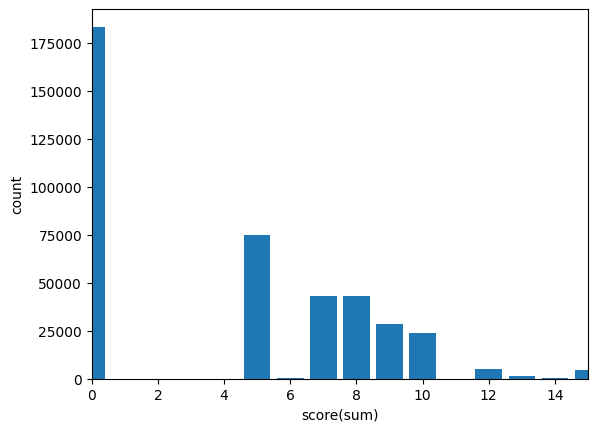

In [11]:
import matplotlib.pyplot as plt

x = [11, 14, 6, 13, 15, 12, 10, 9, 7, 8, 5, 0]
y = df['sent_intensity_sum'].value_counts(ascending = True)

plt.xlim([0, 15])
plt.xlabel('score(sum)')
plt.ylabel('count')
plt.bar(x, y)

In [31]:
idx = list(range(408369))
df2 = pd.DataFrame(columns = ['immoral', 'sum', 'votes'], index = idx)

for i in range(len(merged_df)):
    if merged_df.iloc[i]['sent_is_immoral'] == True:
        df2.iloc[i]['immoral'] = merged_df.iloc[i]['sent_is_immoral']
        df2.iloc[i]['sum'] = merged_df.iloc[i]['sent_intensity_sum']
        df2.iloc[i]['votes'] = merged_df.iloc[i]['sent_votes']

df2

,immoral,sum,votes
0,True,10,"[{'intensity': 'IRRITABLE', 'voter': {'gender'..."
1,True,10,"[{'intensity': 'IRRITABLE', 'voter': {'gender'..."
2,True,10,"[{'intensity': 'IRRITABLE', 'voter': {'gender'..."
3,True,10,"[{'intensity': 'IRRITABLE', 'voter': {'gender'..."
4,True,5,"[{'intensity': 'UNPLEASANT', 'voter': {'gender..."
...,...,...,...
408364,NaN,NaN,NaN
408365,True,9,"[{'intensity': 'UNPLEASANT', 'voter': {'gender..."
408366,NaN,NaN,NaN
408367,True,9,"[{'intensity': 'IRRITABLE', 'voter': {'gender'..."


In [32]:
df3 = df2.dropna(subset = ['immoral'])
df3

,immoral,sum,votes
0,True,10,"[{'intensity': 'IRRITABLE', 'voter': {'gender'..."
1,True,10,"[{'intensity': 'IRRITABLE', 'voter': {'gender'..."
2,True,10,"[{'intensity': 'IRRITABLE', 'voter': {'gender'..."
3,True,10,"[{'intensity': 'IRRITABLE', 'voter': {'gender'..."
4,True,5,"[{'intensity': 'UNPLEASANT', 'voter': {'gender..."
...,...,...,...
408362,True,8,"[{'intensity': 'UNPLEASANT', 'voter': {'gender..."
408363,True,8,"[{'intensity': 'UNPLEASANT', 'voter': {'gender..."
408365,True,9,"[{'intensity': 'UNPLEASANT', 'voter': {'gender..."
408367,True,9,"[{'intensity': 'IRRITABLE', 'voter': {'gender'..."


In [34]:
df3['sum'].value_counts()

5     74979
8     43144
7     42943
9     28249
10    23609
12     5009
15     4622
13     1555
6       564
14      343
11       60
Name: sum, dtype: int64